(96, 128, 128)
(4, 4)
(96, 128, 128)


D:\program file\jupyterlab\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


(96, 128, 128)
(4, 4)
(96, 128, 128)
(96, 128, 128)
(4, 4)
(96, 128, 128)
(96, 128, 128)
(4, 4)
(96, 128, 128)


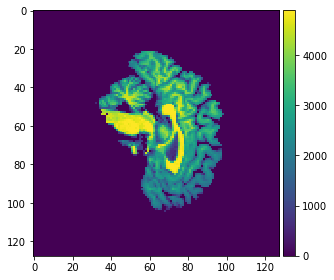

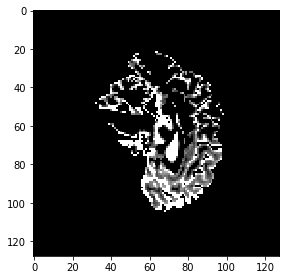

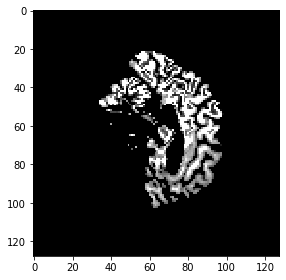

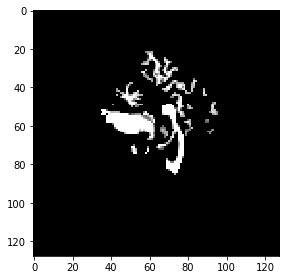

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.data import fetch_tissue_data, read_tissue_data
from dipy.segment.tissue import TissueClassifierHMRF
import nibabel as nib
import skimage.io as io

# segment the img via FSL's FAST:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img = nib.load('d:/Downloads/neurodatadesign/ndmg/tests/ndmg_outputs/anat/preproc/t1w_brain.nii.gz')
print(img.shape)
print(img.affine.shape)
img_arr = img.get_fdata()
print(img_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_arr[46])

# this is the CSF produced by FAST
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_csfprob = nib.load('d:/Downloads/neurodatadesign/ndmg/tests/ndmg_outputs/anat/preproc/t1w_seg_pve_0.nii.gz')
print(img_csfprob.shape)
print(img_csfprob.affine.shape)
img_csfprob_arr = img_csfprob.get_fdata()
print(img_csfprob_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_csfprob_arr[46])

# this is the greymatter produced by FAST
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_gmprob = nib.load('d:/Downloads/neurodatadesign/ndmg/tests/ndmg_outputs/anat/preproc/t1w_seg_pve_1.nii.gz')
print(img_gmprob.shape)
print(img_gmprob.affine.shape)
img_gmprob_arr = img_gmprob.get_fdata()
print(img_gmprob_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_gmprob_arr[46])

# this is the whitematter produced by FAST
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_vmprob = nib.load('d:/Downloads/neurodatadesign/ndmg/tests/ndmg_outputs/anat/preproc/t1w_seg_pve_2.nii.gz')
print(img_vmprob.shape)
print(img_vmprob.affine.shape)
img_vmprob_arr = img_vmprob.get_fdata()
print(img_vmprob_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_vmprob_arr[46])

>> Iteration: 0
>> Iteration: 1
>> Iteration: 2
>> Iteration: 3
>> Iteration: 4
>> Iteration: 5
>> Iteration: 6
>> Iteration: 7
>> Iteration: 8
>> Iteration: 9
>> Iteration: 10
>> Iteration: 11
>> Iteration: 12
>> Iteration: 13
>> Iteration: 14
>> Iteration: 15
>> Iteration: 16
>> Iteration: 17
>> Iteration: 18
>> Iteration: 19
>> Iteration: 20
>> Iteration: 21
>> Iteration: 22
>> Iteration: 23
>> Iteration: 24
>> Iteration: 25
>> Iteration: 26
>> Iteration: 27
>> Iteration: 28
>> Iteration: 29
>> Iteration: 30


D:\program file\jupyterlab\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


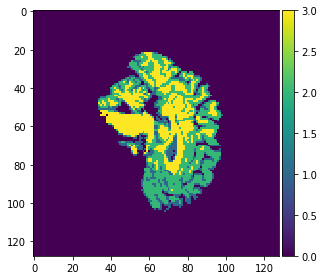

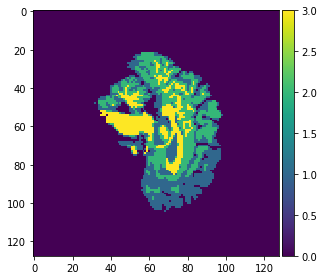

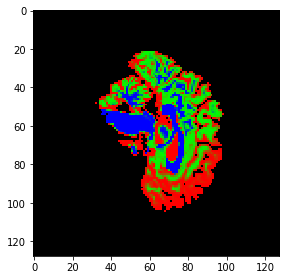

In [3]:
# segment the img by dipy's TissueClassifierHMRF

# first run the TissueClassifierHMRF to segment the t1w img
t1 = img_arr
nclass = 3
beta = 0.1
# tolerance = 0.01
hmrf = TissueClassifierHMRF()
initial_segmentation, final_segmentation, PVE = hmrf.classify(t1, nclass, beta)

# show the picture of initial_segmentation
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(initial_segmentation[46])

# show the picture of final_segmentation
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(final_segmentation[46])

# show 3D probability map of each tissue type
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(PVE[46])

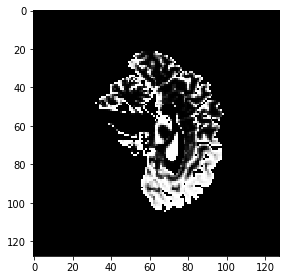

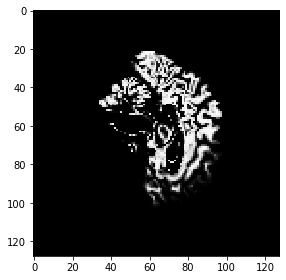

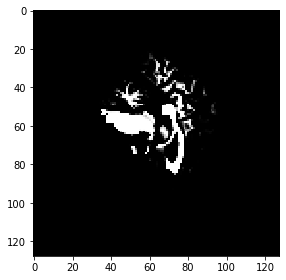

In [4]:
# the picture of CSF, greymatter, whitematter
# CSF:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_cor = PVE[46, :, :, 0]
io.imshow(img_cor)

# greymatter:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_cor = PVE[46, :, :, 1]
io.imshow(img_cor)

# whitematter:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_cor = PVE[46, :, :, 2]
io.imshow(img_cor)

AssertionError: 

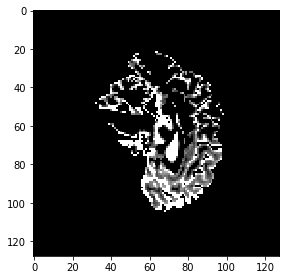

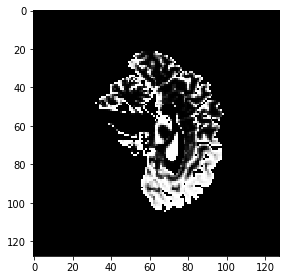

In [5]:
# Compare the results of FAST and dipy's TissueClassifierHMRF
# 1, CSF:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(img_csfprob_arr[46])
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(PVE[46, :, :, 0])
assert np.allclose(img_csfprob_arr[46], PVE[46, :, :, 0])

AssertionError: 

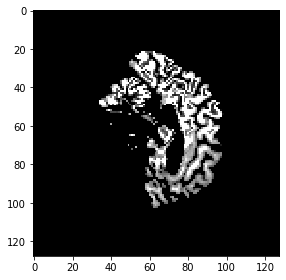

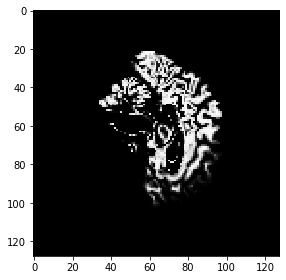

In [6]:
# 2, greymatter:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(img_gmprob_arr[46])
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(PVE[46, :, :, 1])

assert np.allclose(img_gmprob_arr[46], PVE[46, :, :, 1])

AssertionError: 

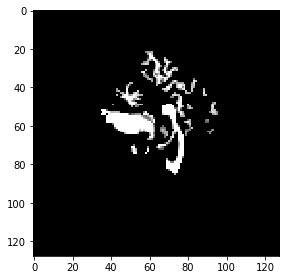

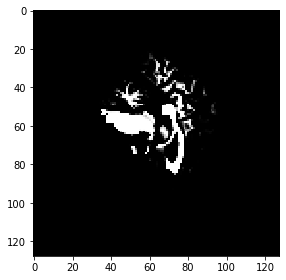

In [7]:
# 3, greymatter:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(img_vmprob_arr[46])
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(PVE[46, :, :, 2])

assert np.allclose(img_vmprob_arr[46], PVE[46, :, :, 2])

Figure(432x288)


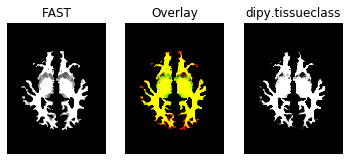

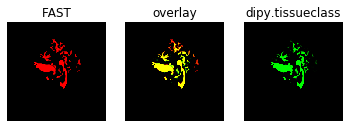

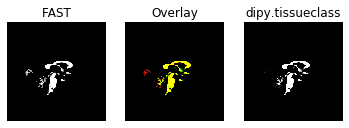

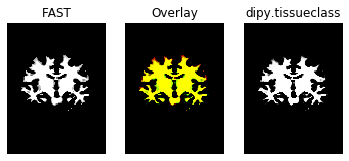

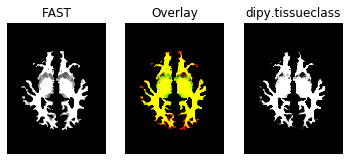

In [9]:
from dipy.viz import regtools
fig = regtools.overlay_images(img_vmprob_arr[46], PVE[46, :, :, 2], 'FAST','overlay', 'dipy.tissueclass')
print(fig)
regtools.overlay_slices(img_vmprob_arr, PVE[:, :, :, 2], None, 0, 'FAST', 'dipy.tissueclass')
regtools.overlay_slices(img_vmprob_arr, PVE[:, :, :, 2], None, 1, 'FAST', 'dipy.tissueclass')
regtools.overlay_slices(img_vmprob_arr, PVE[:, :, :, 2], None, 2, 'FAST', 'dipy.tissueclass')